<a href="https://colab.research.google.com/github/aanhisbullah/Bike-Sales-in-Europe/blob/main/Bike_store_sales_in_Europe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aanhisbullah","key":"0e98be2c04f442eab9dbfeac3d685542"}'}

In [4]:
! mkdir ~/.kaggle

In [5]:
!cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets list

ref                                                        title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                      Spotify and Youtube                              9MB  2023-03-20 15:43:25           5776        220  1.0              
erdemtaha/cancer-data                                      Cancer Data                                     49KB  2023-03-22 07:57:00           1635         40  1.0              
ulrikthygepedersen/fastfood-nutrition                      Fastfood Nutrition                              12KB  2023-03-21 10:02:41           1821         40  1.0              
lokeshparab/amazon-products-dataset                        Amazon Products Sales Dataset 2023              80M

In [10]:
! kaggle datasets download -d sadiqshah/bike-sales-in-europe

  0% 0.00/1.15M [00:00<?, ?B/s]
100% 1.15M/1.15M [00:00<00:00, 115MB/s]


In [8]:
! mkdir kaggle

In [11]:
! unzip bike-sales-in-europe.zip -d kaggle

Archive:  bike-sales-in-europe.zip
  inflating: kaggle/Sales.csv        


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import math

In [13]:
df = pd.read_csv('/content/kaggle/Sales.csv')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [15]:
 df['Date'] = pd.to_datetime(df['Date'])
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

In [35]:
df.head(10)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
5,2016-05-15,15,May,2016,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,120,297,225,522
6,2014-05-22,22,May,2014,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,199,180,379
7,2016-05-22,22,May,2016,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,2,45,120,100,90,190
8,2014-02-22,22,February,2014,35,Adults (35-64),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,22,45,120,1096,990,2086
9,2016-02-22,22,February,2016,35,Adults (35-64),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,21,45,120,1046,945,1991


In [17]:
df['Country'].unique()

array(['Canada', 'Australia', 'United States', 'Germany', 'France',
       'United Kingdom'], dtype=object)

In [18]:
df.shape

(113036, 18)

In [19]:
df.isna().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [22]:
df.shape

(113036, 18)

In [24]:
df = df.drop_duplicates()
df.shape

(112036, 18)

In [36]:
df = df.drop(['Revenue', 'Profit'], axis=1)

In [37]:
df.isna().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Cost                0
dtype: int64

In [43]:
df['Revenue'] = df['Order_Quantity'] * df['Unit_Price']
df['Profit'] = df['Revenue'] - df['Cost']
df.head(10)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Cost,Revenue,Profit
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,360,960,600
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,360,960,600
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1035,2760,1725
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,900,2400,1500
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,180,480,300
5,2016-05-15,15,May,2016,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,120,225,600,375
6,2014-05-22,22,May,2014,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,180,480,300
7,2016-05-22,22,May,2016,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,2,45,120,90,240,150
8,2014-02-22,22,February,2014,35,Adults (35-64),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,22,45,120,990,2640,1650
9,2016-02-22,22,February,2016,35,Adults (35-64),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,21,45,120,945,2520,1575


#Numerical analysis and visualization
We'll analyze the Numerical features column:

In [25]:
pd.DataFrame(df['Unit_Cost'].describe())

,Unit_Cost
count,112036.000000
mean,267.819603
std,550.218722
min,1.000000
25%,2.000000
50%,9.000000
75%,42.000000
max,2171.000000


In [26]:
df['Unit_Cost'].tail()

113031    24
113032    24
113033    24
113034    24
113035    24
Name: Unit_Cost, dtype: int64

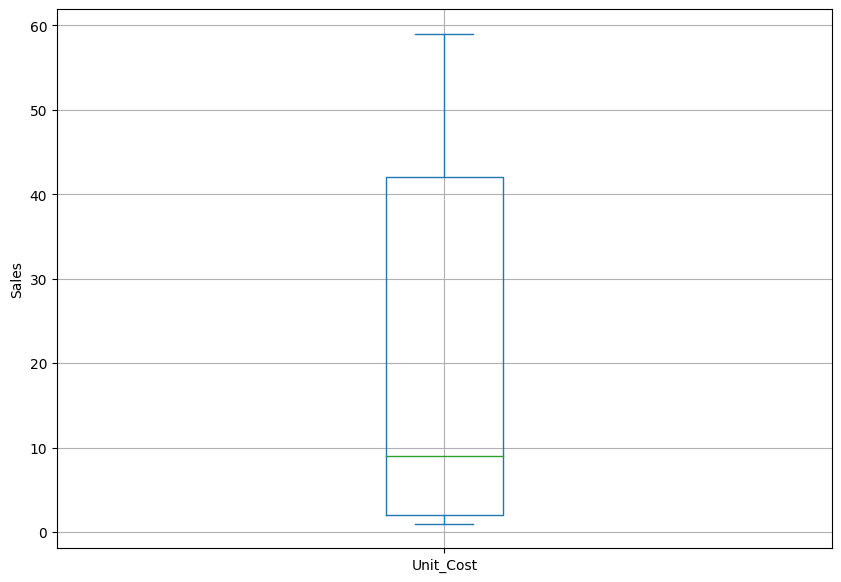

In [27]:
#df['Unit_Cost'].plot(kind="box",figsize=(4,10),vert=True, fontsize=10)

#melihat plot box
ax = df['Unit_Cost'].plot.box(showfliers=False, grid=True, figsize=(10, 7))

ax.set_ylabel('Sales')
#ax.set_title('Unit Cost')

plt.suptitle("")
plt.show()  

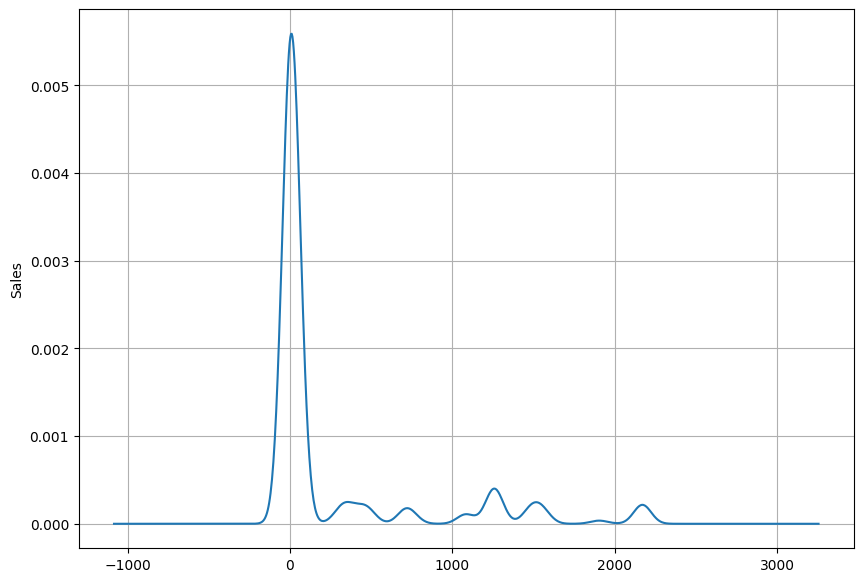

In [28]:
ax = df['Unit_Cost'].plot(kind="density", grid=True, figsize=(10, 7))

ax.set_ylabel('Sales')
#ax.set_title('Unit Cost')
#plt.suptitle("")
plt.show()  

Text(0.5, 0, 'Dollars')

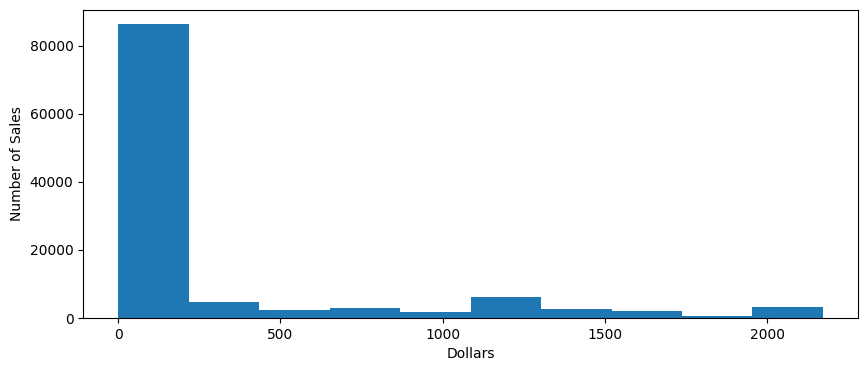

In [29]:
ax = df['Unit_Cost'].plot(kind='hist', figsize=(10,4))
ax.set_ylabel('Number of Sales', fontsize=10)
ax.set_xlabel('Dollars', fontsize=10)

In [84]:
#Mencari jumlah Cases Active Nasional dari mulai kasus pertama (03-2020) hingga terbaru (09-2022)
ytd = df.loc[df['Date'] >= '2015-01-01']
revenue_df = ytd.set_index('Date')['Revenue'].resample('M').sum()
revenue_df

Date
2015-01-31     746794
2015-02-28     771004
2015-03-31     806391
2015-04-30     834341
2015-05-31    1010976
2015-06-30     890743
2015-07-31    1929592
2015-08-31    2364112
2015-09-30    2735911
2015-10-31    2800482
2015-11-30    3153976
2015-12-31    4274032
2016-01-31    2819006
2016-02-29    2710607
2016-03-31    2890849
2016-04-30    3048376
2016-05-31    3610239
2016-06-30    3970524
2016-07-31     550214
Freq: M, Name: Revenue, dtype: int64

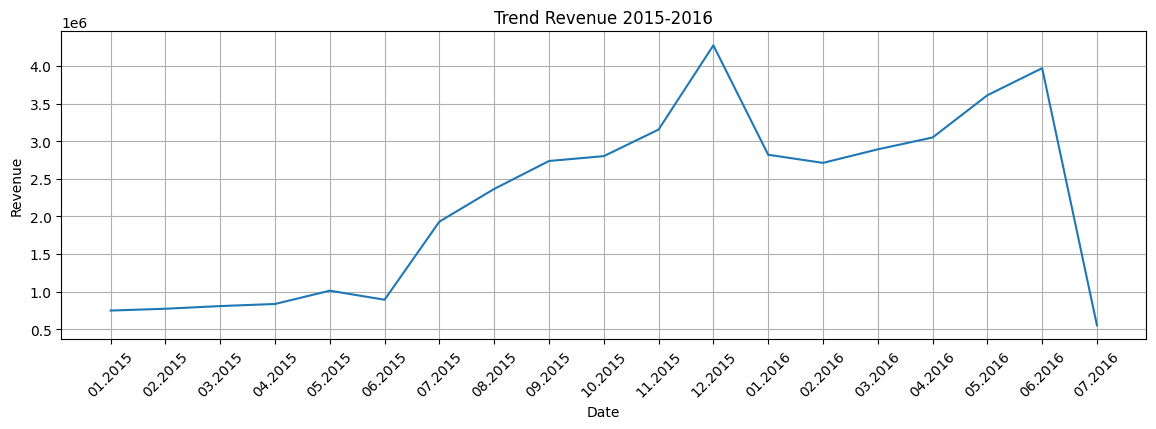

In [85]:
ax = pd.DataFrame(revenue_df.values).plot(
    grid=True,
    figsize=(14,4),
    legend=False
)

ax.set_xlabel('Date')
ax.set_ylabel('Revenue')
ax.set_title('Trend Revenue 2015-2016')

plt.xticks(
    range(len(revenue_df.index)), 
    [x.strftime('%m.%Y') for x in revenue_df.index], 
    rotation=45
)

plt.show()


In [93]:
# What is the total profit by Product Category?
df_prod_cat = ytd.groupby(['Product_Category','Date'])['Revenue'].sum()
df_prod_cat

Product_Category  Date      
Accessories       2015-07-01     5111
                  2015-07-02     6711
                  2015-07-03     6021
                  2015-07-04     7403
                  2015-07-05     3688
                                ...  
Clothing          2016-07-27     6153
                  2016-07-28     6923
                  2016-07-29     8650
                  2016-07-30     6702
                  2016-07-31    10970
Name: Revenue, Length: 1338, dtype: int64

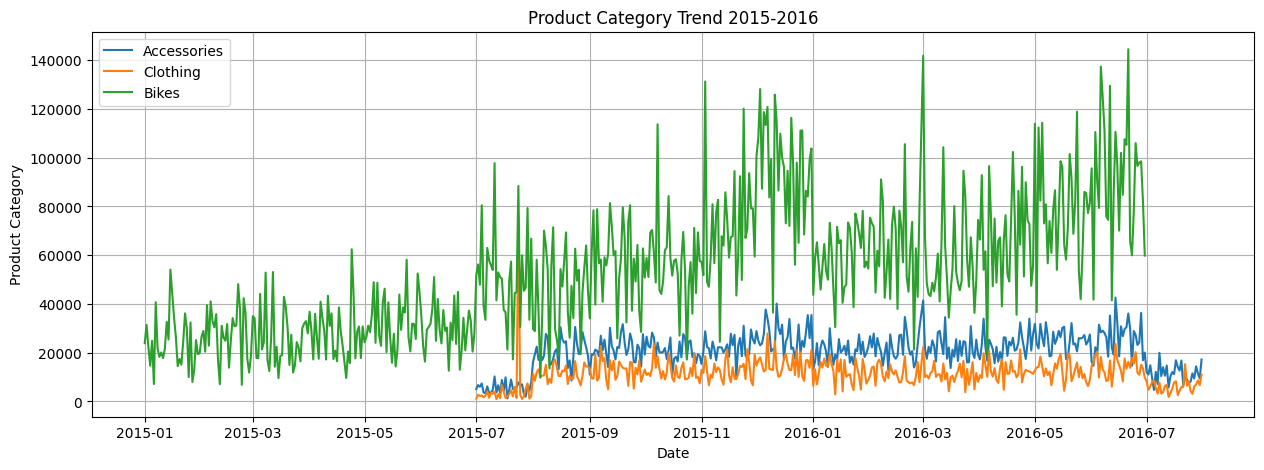

In [94]:
#Visualization Trend Product_Category Ytd 2016
plt.figure(figsize=(15,5))
plt.plot(df_prod_cat.loc['Accessories'], label='Accessories')
plt.plot(df_prod_cat.loc['Clothing'], label='Clothing')
plt.plot(df_prod_cat.loc['Bikes'], label='Bikes')

plt.grid()
plt.ylabel('Product Category')
plt.xlabel('Date')
plt.title('Product Category Trend 2015-2016')
plt.legend(loc='upper left')

In [98]:
# How are the product categories performing?

df_pc = df.groupby(['Product_Category'])['Revenue'].sum()
df_pc

Product_Category
Accessories    16606777
Bikes          68827927
Clothing        9253884
Name: Revenue, dtype: int64

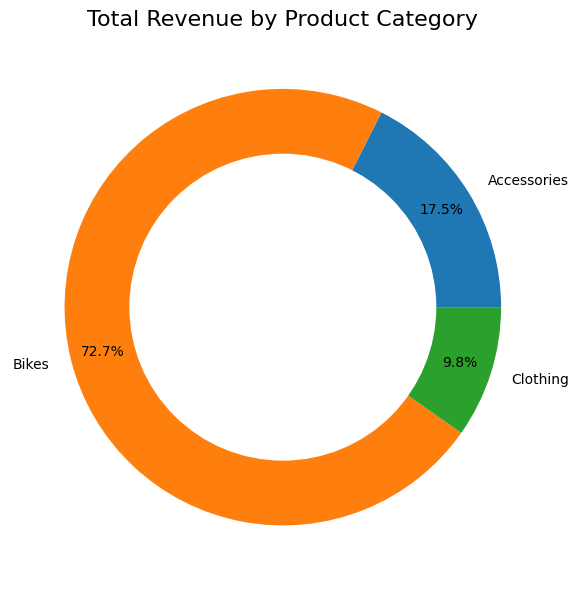

In [99]:
# A donut chart to represent the product category performance

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
label = ['Accessories', 'Bikes', 'Clothing']
plt.pie(df_pc, labels=label,
        autopct='%1.1f%%', pctdistance=0.85)
circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
ax.set_title("Total Revenue by Product Category",fontdict={'fontsize': 16})
plt.tight_layout()
plt.show()

In [96]:
df_pie = df.groupby(['Country'])['Profit'].sum()
df_pie

Country
Australia         10847833
Canada             3780531
France             4283045
Germany            4351687
United Kingdom     4824853
United States     13820106
Name: Profit, dtype: int64

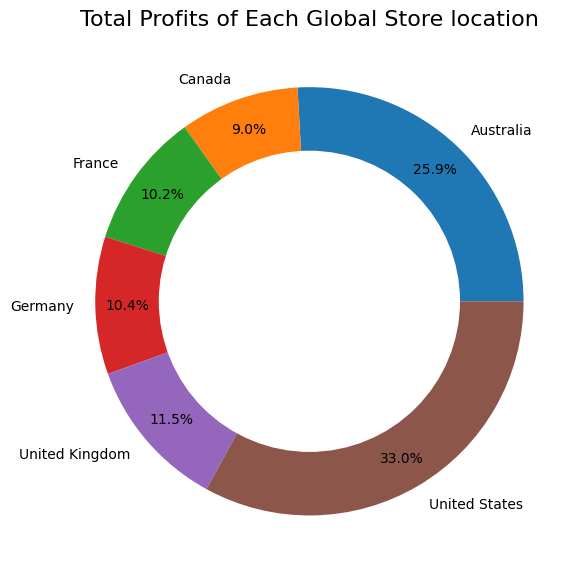

In [97]:
# A donut chart to visualize profit by each location

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
label = ['Australia', 'Canada', 'France', 'Germany', 'United Kingdom', 'United States']
plt.pie(df_pie, labels=label,
        autopct='%1.1f%%', pctdistance=0.85)
circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
ax.set_title("Total Profits of Each Global Store location",fontdict={'fontsize': 16})
plt.tight_layout()
plt.show()

<ipython-input-100-51c70d582e3d>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data= df, x='Country', y='Revenue', hue='Age_Group',palette='deep',alpha=1,ci=None, ax=ax)


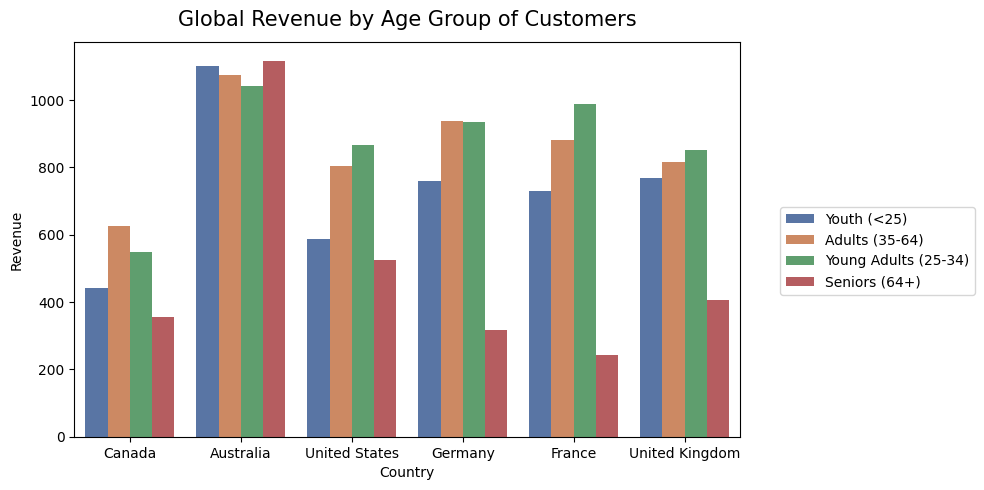

In [100]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data= df, x='Country', y='Revenue', hue='Age_Group',palette='deep',alpha=1,ci=None, ax=ax)
plt.title('Global Revenue by Age Group of Customers',fontdict={'fontsize': 15}, y=1.02)
plt.legend(bbox_to_anchor=(1.05, 0.6))
plt.tight_layout()
plt.show()

#Conclusion
We have done some activities in this project, such as;

Data cleaning, Data addition, Some calculations, Exploration data analysis.

##Here are some findings.
Bicycle is the most popular product category. There is variation in the age group of the highest spenders in Australia, but senior citizens are generally the lowest spenders. The United States is the most profitable market for the company.
The Revenue Trend Month to date of July 2016 shows unsatisfactory results even compared to MTD July 2015 which has decreased.
This is because the bikes category product data has not been updated so that the overall revenue figure does not seem to be growing,
but keep in mind that other product categories such as accessories and clothing have decreased revenue so that future sales must be increased.
